In [66]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [67]:
import pandas as pd 
import numpy as np
import yfinance as yf
import seaborn as sns 
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [68]:
# download data 
# NVDA
df = yf.download('AMZN' ,
                 start='2020-01-01', 
                 end='2021-12-31', 
                 auto_adjust=False,
                 progress=False)

In [69]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,93.750000,94.900497,93.207497,94.900497,94.900497,80580000
2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000
2020-01-06,93.000000,95.184502,93.000000,95.143997,95.143997,81236000
2020-01-07,95.224998,95.694504,94.601997,95.343002,95.343002,80898000
2020-01-08,94.902000,95.550003,94.321999,94.598503,94.598503,70160000
...,...,...,...,...,...,...
2021-12-23,170.427994,171.975006,170.149994,171.068497,171.068497,36788000
2021-12-27,171.037003,172.942993,169.215500,169.669495,169.669495,58688000
2021-12-28,170.182495,172.175995,169.135498,170.660995,170.660995,54638000


In [70]:
# am pastrat doar pretul de inchidere ajustat(adjusted close price)
df = df.loc[:, ['Adj Close']]
df.rename(columns={'Adj Close': 'adj_close'}, inplace=True)

In [71]:
# calculate simple returns
df['simple_rtn'] = df.adj_close.pct_change()
df['log_rtn'] = np.log(df.adj_close/df.adj_close.shift(1))

In [72]:
# remove redundant data
df.drop('adj_close', axis=1, inplace=True)
df.dropna(axis=0, inplace=True)

In [73]:
# INSPECT THE DATA
df.head()

,simple_rtn,log_rtn
Date,,
2020-01-03,-0.012139,-0.012213
2020-01-06,0.014886,0.014776
2020-01-07,0.002092,0.002089
2020-01-08,-0.007809,-0.007839
2020-01-09,0.004799,0.004788


In [74]:
# Definirea functiei pentru calcularea volatilitatii realizate:
def realized_volatility(x):
    return np.sqrt(np.sum(x**2))

# Calcularea volatilitatii lunare realizate
df_rv = df.groupby(pd.Grouper(freq='M')).apply(realized_volatility)
df_rv.rename(columns={'log_rtn': 'rv'}, inplace=True)


In [75]:
# Anualizarea valorilor:
df_rv.rv = df_rv.rv * np.sqrt(12)

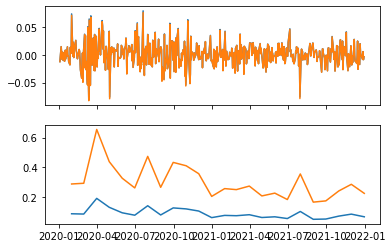

In [77]:
# Afisarea rezultatelor (Plot)
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(df)
ax[1].plot(df_rv)
plt.show()

In [78]:
# Calcularea lui Normal PDF folosind media si deviatia standard a observed returns:
r_range = np.linspace(min(df.log_rtn), max(df.log_rtn), num=1000)
mu = df.log_rtn.mean()
sigma = df.log_rtn.std()
norm_pdf = scs.norm.pdf(r_range, loc=mu, scale=sigma) 

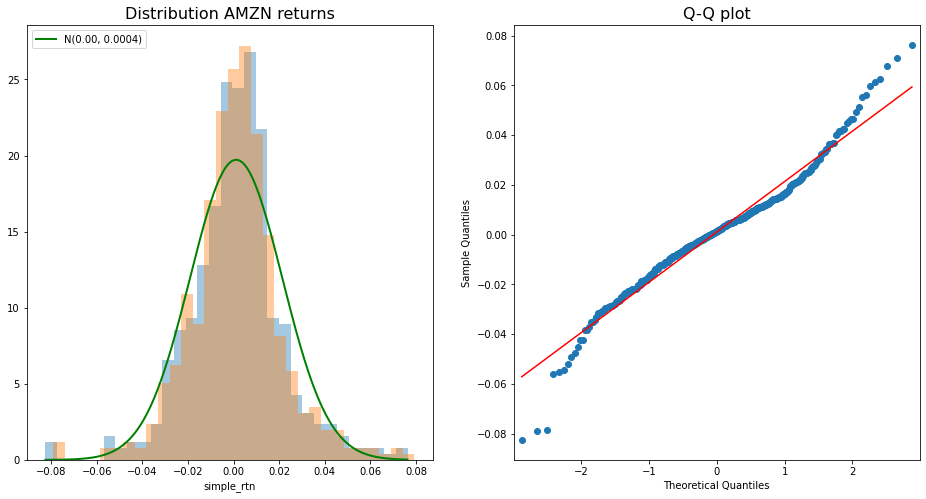

In [79]:
# Plot histograma si Q-Q Plot:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# histograma
sns.distplot(df.log_rtn, kde=False, norm_hist=True, ax=ax[0])
sns.distplot(df.simple_rtn, kde=False, norm_hist=True, ax=ax[0])
ax[0].set_title('Distribution AMZN returns', fontsize=16)                                                    
ax[0].plot(r_range, norm_pdf, 'g', lw=2, 
           label=f'N({mu:.2f}, {sigma**2:.4f})')
ax[0].legend(loc='upper left');

# Q-Q plot
qq = sm.qqplot(df.log_rtn.values, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot', fontsize = 16)

plt.show()

In [80]:
# vizualizarea seriilor de timp
# descarcarea datelor ca si pandas DataFrame
df = yf.download('AMZN', auto_adjust = False, progress=False)
df = df.loc[:, ['Adj Close']]
df.rename(columns={'Adj Close': 'adj_close'}, inplace=True)

# create simple and log returns (randamente zilnice)
df['simple_rtn'] = df.adj_close.pct_change()
df['log_rtn'] = np.log(df.adj_close / df.adj_close.shift(1))

# dropping NA's in the first row
df.dropna(how = 'any', inplace = True)

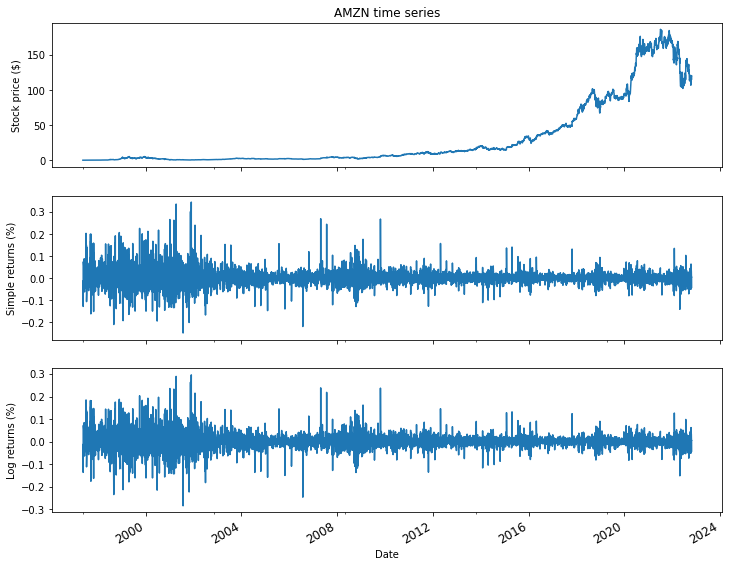

In [83]:
fig, ax = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# add prices
df.adj_close.plot(ax=ax[0])
ax[0].set(title = 'AMZN time series',
          ylabel = 'Stock price ($)')
    
# add simple returns 
df.simple_rtn.plot(ax=ax[1])
ax[1].set(ylabel = 'Simple returns (%)')

# add log returns 
df.log_rtn.plot(ax=ax[2])
ax[2].set(xlabel = 'Date', 
          ylabel = 'Log returns (%)')

ax[2].tick_params(axis='x', 
                  which='major', 
                  labelsize=12)

plt.show()